# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial'

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# print statement
print('Beginning Data Retrieval')
print('-----------------------------')

#establish variables for the record and the set counts
record = 1
count = 1

#start the count and set the range of the count from 0-50
for counter, city in enumerate(cities, 1):
    if (counter %50==0 and counter >=50):
        record = 1 
        count += 1
    
    #pritn statement    
    print(f'Processing Record {record} of Set {count} | {city}')
   
    record += 1

    #have to estaablish a try excpet in case there  
    try:
        query_url = f'{base_url}&q={city}'
        response = requests.get(query_url).json()
    
    #except in case a city is not found in the records. Don't forget to pass!
    except:
        print(f'City not found. Skipping...')
        pass

# print statement    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ashti
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | verkhnyaya inta
Processing Record 6 of Set 1 | kakching
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | nouadhibou
Processing Record 12 of Set 1 | taybad
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | taolanaro
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | tilichiki
Processing Record 17 of Set 1 | calama
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | rocha
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | padang
Processing Record 22 of Set 1 | suwanee
Processing Record 23 of Set 1 | danville
Proces

Processing Record 50 of Set 4 | frydek-mistek
Processing Record 1 of Set 5 | labuhan
Processing Record 2 of Set 5 | lerwick
Processing Record 3 of Set 5 | sibolga
Processing Record 4 of Set 5 | haverfordwest
Processing Record 5 of Set 5 | hay river
Processing Record 6 of Set 5 | ostrovnoy
Processing Record 7 of Set 5 | florianopolis
Processing Record 8 of Set 5 | victoria
Processing Record 9 of Set 5 | faridpur
Processing Record 10 of Set 5 | samana
Processing Record 11 of Set 5 | san policarpo
Processing Record 12 of Set 5 | finschhafen
Processing Record 13 of Set 5 | sao filipe
Processing Record 14 of Set 5 | fort nelson
Processing Record 15 of Set 5 | faanui
Processing Record 16 of Set 5 | grand centre
Processing Record 17 of Set 5 | areosa
Processing Record 18 of Set 5 | sobolevo
Processing Record 19 of Set 5 | pacific grove
Processing Record 20 of Set 5 | conway
Processing Record 21 of Set 5 | hengshan
Processing Record 22 of Set 5 | adet
Processing Record 23 of Set 5 | takahata
P

Processing Record 48 of Set 8 | pisco
Processing Record 49 of Set 8 | narsaq
Processing Record 50 of Set 8 | maniitsoq
Processing Record 1 of Set 9 | san andres
Processing Record 2 of Set 9 | cochrane
Processing Record 3 of Set 9 | meulaboh
Processing Record 4 of Set 9 | southbridge
Processing Record 5 of Set 9 | homa bay
Processing Record 6 of Set 9 | magdagachi
Processing Record 7 of Set 9 | yadgir
Processing Record 8 of Set 9 | bur gabo
Processing Record 9 of Set 9 | haibowan
Processing Record 10 of Set 9 | ouallam
Processing Record 11 of Set 9 | berezovka
Processing Record 12 of Set 9 | blenheim
Processing Record 13 of Set 9 | sao miguel do araguaia
Processing Record 14 of Set 9 | dunmore east
Processing Record 15 of Set 9 | seoul
Processing Record 16 of Set 9 | beringovskiy
Processing Record 17 of Set 9 | camargo
Processing Record 18 of Set 9 | general roca
Processing Record 19 of Set 9 | ordu
Processing Record 20 of Set 9 | mahon
Processing Record 21 of Set 9 | laguna
Processing 

Processing Record 46 of Set 12 | sungairaya
Processing Record 47 of Set 12 | tarko-sale
Processing Record 48 of Set 12 | sucua
Processing Record 49 of Set 12 | waren
Processing Record 50 of Set 12 | chore
Processing Record 1 of Set 13 | colares
Processing Record 2 of Set 13 | port hedland
Processing Record 3 of Set 13 | visby
Processing Record 4 of Set 13 | esil
Processing Record 5 of Set 13 | sirjan
Processing Record 6 of Set 13 | novichikha
Processing Record 7 of Set 13 | ozgon
Processing Record 8 of Set 13 | gondanglegi
Processing Record 9 of Set 13 | okha
Processing Record 10 of Set 13 | vigia del fuerte
Processing Record 11 of Set 13 | athabasca
Processing Record 12 of Set 13 | brahmapuri
Processing Record 13 of Set 13 | tayport
Processing Record 14 of Set 13 | navabad
Processing Record 15 of Set 13 | caceres
Processing Record 16 of Set 13 | ozernovskiy
Processing Record 17 of Set 13 | vila velha
Processing Record 18 of Set 13 | kashi
Processing Record 19 of Set 13 | takoradi
----

In [4]:
response

{'coord': {'lon': -1.7554, 'lat': 4.8845},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 79.14,
  'feels_like': 84.56,
  'temp_min': 79.14,
  'temp_max': 79.14,
  'pressure': 1010,
  'humidity': 87,
  'sea_level': 1010,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 8.7, 'deg': 222},
 'clouds': {'all': 96},
 'dt': 1614555097,
 'sys': {'country': 'GH', 'sunrise': 1614493144, 'sunset': 1614536422},
 'timezone': 0,
 'id': 2294915,
 'name': 'Takoradze',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
name = []         
lat = []           
lng = []          
max_temp = []      
humidity = []      
cloudiness = []   
wind_speed =[]
country = []      
date = []

for city in cities:
    
    try: 
        query_url = f'{base_url}&q={city}'
        response = requests.get(query_url).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    except:
        pass

In [6]:
city_dict = {"City" : name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date}

pd.DataFrame(city_dict).count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [7]:
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,64.99,76,100,4.00,AU,1614554915
1,Rikitea,-23.1203,-134.9692,78.39,77,28,12.19,PF,1614554915
2,Ashti,19.3833,76.2333,76.44,25,0,4.70,IN,1614554916
3,Atuona,-9.8000,-139.0333,80.37,78,6,16.31,PF,1614554916
4,Verkhnyaya Inta,65.9811,60.3094,4.55,92,97,9.75,RU,1614554916


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_df = city_data.loc[(city_data['Humidity'] < 100)]
humidity_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [10]:
#  Get the indices of cities that have humidity over 100%.
city_data[city_data['Humidity'] > 100].index

Int64Index([], dtype='int64')

In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_data.to_csv('../output_data/cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

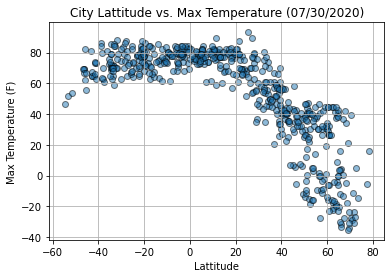

In [12]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], alpha = 0.5, edgecolors = 'black')

plt.title('City Lattitude vs. Max Temperature (07/30/2020)')
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('../output_data/1. Lat_vs_Maxtemp.png')
plt.show()

## Latitude vs. Humidity Plot

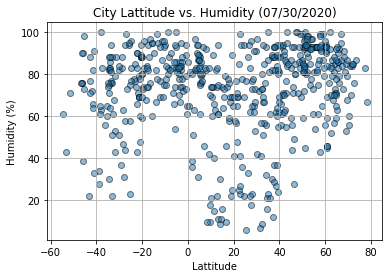

In [13]:
plt.scatter(city_data['Lat'], city_data['Humidity'], alpha = 0.5, edgecolors = 'black')

plt.title('City Lattitude vs. Humidity (07/30/2020)')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../output_data/2. Lat_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

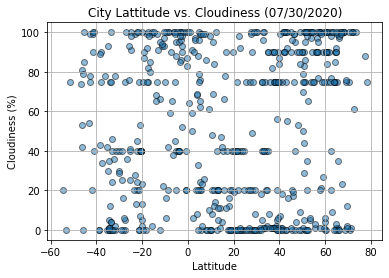

In [14]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], alpha = 0.5, edgecolors = 'black')

plt.title('City Lattitude vs. Cloudiness (07/30/2020)')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../output_data/3. Lat_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

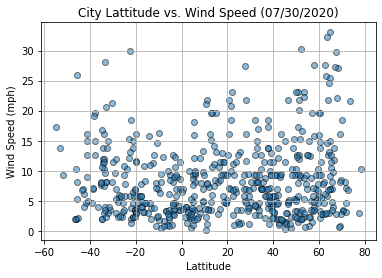

In [15]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], alpha = 0.5, edgecolors = 'black')

plt.title('City Lattitude vs. Wind Speed (07/30/2020)')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../output_data/4. Lat_vs_Wind Speed.png')
plt.show()

## Linear Regression

In [16]:
# Create Northern Hemisphere DataFrames
northern_df = city_data.loc[(city_data['Lat'] >= 0)]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ashti,19.3833,76.2333,76.44,25,0,4.70,IN,1614554916
4,Verkhnyaya Inta,65.9811,60.3094,4.55,92,97,9.75,RU,1614554916
5,Kakching,24.4833,93.9833,51.98,69,0,1.50,IN,1614554916
7,Saskylakh,71.9167,114.0833,-23.40,84,100,7.18,RU,1614554917
8,Kahului,20.8947,-156.4700,78.80,57,40,21.85,US,1614554917


In [17]:
# Create Southern Hemisphere DataFrames
southern_df = city_data.loc[(city_data['Lat'] < 0)]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,64.99,76,100,4.00,AU,1614554915
1,Rikitea,-23.1203,-134.9692,78.39,77,28,12.19,PF,1614554915
3,Atuona,-9.8000,-139.0333,80.37,78,6,16.31,PF,1614554916
6,Castro,-24.7911,-50.0119,64.26,96,91,7.81,BR,1614554901
15,Calama,-22.4667,-68.9333,69.80,43,20,29.93,CL,1614554919


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7162324033326222


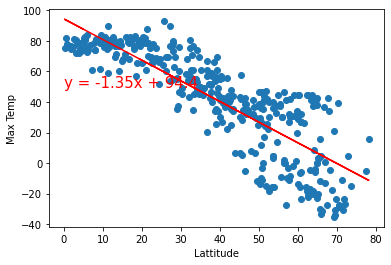

In [18]:
x_values = northern_df['Lat']
y_values =  northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/5. Northern Max Temp vs. Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.16969049033404943


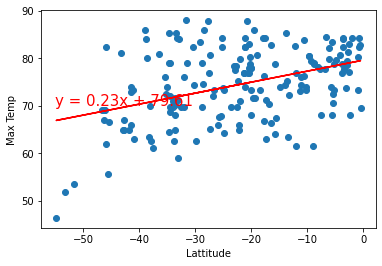

In [19]:
x_values = southern_df['Lat']
y_values =  southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/6. Southern Max Temp vs. Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08752506089800811


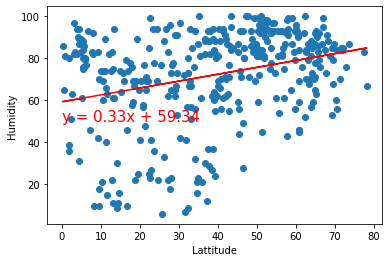

In [20]:
x_values = northern_df['Lat']
y_values =  northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/7. Northern Humidity vs. Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10079954969563058


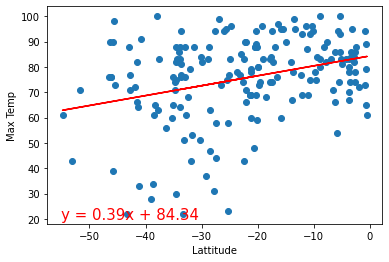

In [21]:
x_values = southern_df['Lat']
y_values =  southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/8. Southern Humidity vs. Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05701619261449531


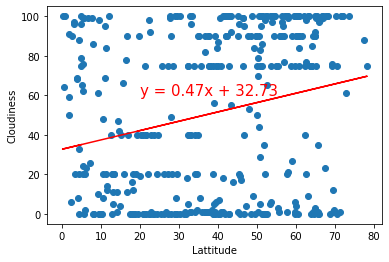

In [22]:
x_values = northern_df['Lat']
y_values =  northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/9. Northern Cloudiness vs. Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08149740835981616


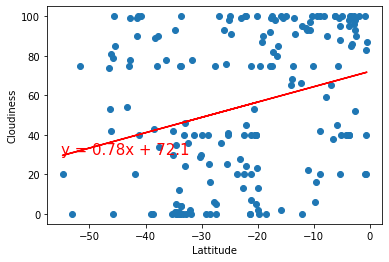

In [23]:
x_values = southern_df['Lat']
y_values =  southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/10. Souththern Cloudiness vs. Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02347924078574177


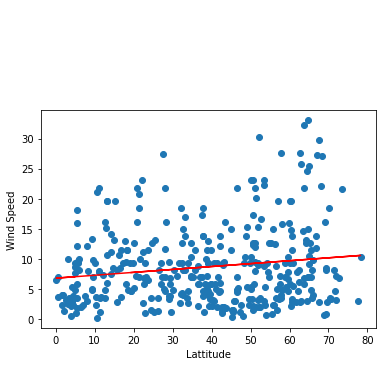

In [24]:
x_values = northern_df['Lat']
y_values =  northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/11. Northern Wind Speed vs. Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06435233797627496


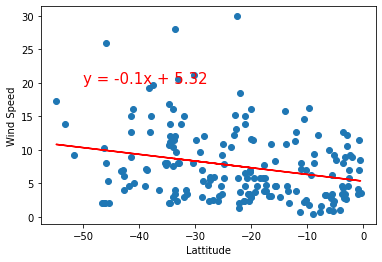

In [25]:
x_values = southern_df['Lat']
y_values =  southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,20), fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/12. Southern Wind Speed vs. Lat.png')
plt.show()

# Observations
  * Locations closer to the equator experience extreme temperatures and more humidity. 
  * Humididy doesn't seem to be correlated with the latitude from both the hemisphere. 
  * Data points are scattered throughout the plot, except for an outlier in Southern hemisphere, far from the regression line. 
  * THe Northern hemisphere tends to be much more humid than the Southern hemisphere. 